# 1. Decision Tree

In this lab we will be implementing Decision Tree using Scikit-Learn.

### 1.1 Input

Importing standard modules and the dataset.

In [1]:
# Import the standard modules to be used in this lab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

The dataset is available in sklearn. So we have to import the dataset into IPython and store it in a variable called cancer.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data)
y = cancer.target

We split the dataset into training and test sets. Then we further split the training set to create a validation set.

In [3]:
from sklearn.model_selection import train_test_split
seed_num = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(364, 30)
(91, 30)
(114, 30)


### 1.2 Decision Tree

Decision tree classifier can be built by importing ```DecisionTreeClassifier``` module from ```sklearn.tree```. These are sme of the parameters that can be set:
- ```criterion```: the criteria to measure the quality of the split i.e. 'gini' (default) or 'entropy'.
- ```max_depth```: the maximum depth of the tree. By default the value is None which means the tree will be built until all leaves contain less than ```min_sample_split``` samples. 
- ```min_samples_split```: the minimum number of samples required to split the node.

In [4]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini', random_state=seed_num)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Let's evaluate the performance of the model by predicting the test set.

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
[[45  2]
 [ 4 63]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



Let's set the parameters to find the optimal model. Let's build four models with different ```max_depth``` values. We also increase the ```min_samples_split``` to 10 (it can be a different value).

In [6]:
dt_models = []
depths = np.arange(3,8,1)
for d in depths:
    model = DecisionTreeClassifier(criterion='gini', min_samples_split=15, max_depth=d, random_state=seed_num)
    model.fit(X_train, y_train)
    dt_models.append(model)

We use the validation set to determine the best ```max_depth``` parameter.

In [7]:
best_acc = 0
model_best = None
for m, d in zip(dt_models, depths):
    acc = m.score(X_val, y_val)
    print(f'Decision Tree classifier with max_depth={d} achieves a mean accuracy of {acc}')
    if acc > best_acc:
        best_acc = acc
        model_best = m

Decision Tree classifier with max_depth=3 achieves a mean accuracy of 0.8791208791208791
Decision Tree classifier with max_depth=4 achieves a mean accuracy of 0.8791208791208791
Decision Tree classifier with max_depth=5 achieves a mean accuracy of 0.8791208791208791
Decision Tree classifier with max_depth=6 achieves a mean accuracy of 0.8791208791208791
Decision Tree classifier with max_depth=7 achieves a mean accuracy of 0.8791208791208791


In [8]:
y_pred = model_best.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.956140350877193
[[44  3]
 [ 2 65]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Let's see how the tree was constructed. We can visualize the tree using text representation or plot method. <br>
Here we build a text report of the decision tree rules.

In [9]:
from sklearn.tree import plot_tree, export_text
#plot_tree(model_best)
print(export_text(model_best, feature_names=list(X.columns)))

|--- 27 <= 0.14
|   |--- 23 <= 957.45
|   |   |--- 10 <= 0.64
|   |   |   |--- class: 1
|   |   |--- 10 >  0.64
|   |   |   |--- class: 0
|   |--- 23 >  957.45
|   |   |--- class: 0
|--- 27 >  0.14
|   |--- 2 <= 71.82
|   |   |--- class: 1
|   |--- 2 >  71.82
|   |   |--- 6 <= 0.09
|   |   |   |--- class: 1
|   |   |--- 6 >  0.09
|   |   |   |--- class: 0



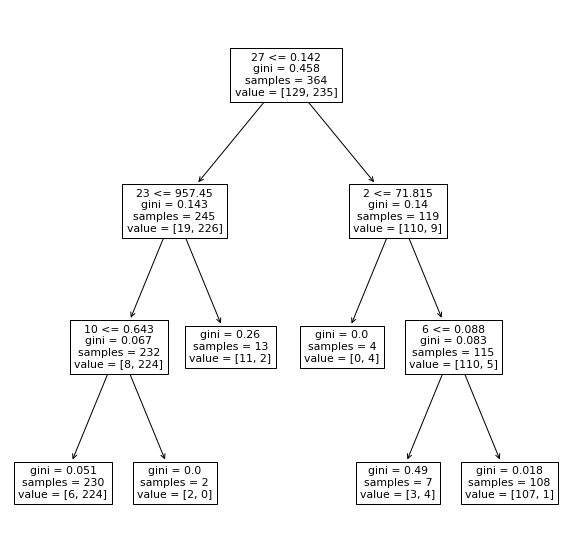

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(model_best, feature_names=list(X.columns))
plt.show()

Let's plot the decision boundary of the Decision Tree classifier. For this purpose we will be extracting two features and train a decision tree model using the features.

In [11]:
X_train_np = X_train.values
X2_train = X_train_np[:,:2] # Using only first two features
index = np.where(y_train==1)[0] # Index of records where y_train = 1
X2_train_normal = X2_train[index] # Records from X2 where y_train = 1
y2_train_normal = y_train[index] # Entries where y_train = 1
index = np.where(y_train==0)[0] # Index of records where y_train = 0
X2_train_abnormal = X2_train[index] # Records from X2 where y_train = 0
y2_train_abnormal = y_train[index] # Entries where y_train = 0
model_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=d, random_state=seed_num)
model_dt.fit(X2_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=0)

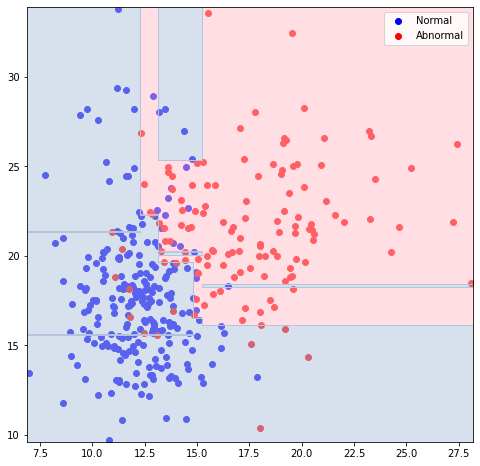

In [12]:
from matplotlib.colors import ListedColormap
cmap_regions = ListedColormap(['pink', 'lightsteelblue'])
step = 0.02
offset = 0.1
xx1_min, xx1_max = X_train_np[:,0].min() - offset, X_train_np[:,0].max() + offset 
xx2_min, xx2_max = X_train_np[:,1].min() - offset, X_train_np[:,1].max() + offset
xx1, xx2 = np.meshgrid(np.arange(xx1_min, xx1_max, step), np.arange(xx2_min, xx2_max, step))
zz = model_dt.predict(np.c_[xx1.ravel(), xx2.ravel()])
zz = zz.reshape(xx1.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(X2_train_normal[:,0], X2_train_normal[:,1], c='blue', label='Normal')
ax.scatter(X2_train_abnormal[:,0], X2_train_abnormal[:,1], c='red', label='Abnormal')
ax.contourf(xx1, xx2, zz, cmap=cmap_regions, alpha=0.5)
plt.legend()